<a href="https://colab.research.google.com/github/SachinPrasanth777/flask-app/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score,learning_curve
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv('LoanApprovalPrediction.csv')
df.describe(include='all')
print(df.head(10))

    Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No         0.0      Graduate            No   
1  LP001003   Male     Yes         1.0      Graduate            No   
2  LP001005   Male     Yes         0.0      Graduate           Yes   
3  LP001006   Male     Yes         0.0  Not Graduate            No   
4  LP001008   Male      No         0.0      Graduate            No   
5  LP001011   Male     Yes         2.0      Graduate           Yes   
6  LP001013   Male     Yes         0.0  Not Graduate            No   
7  LP001014   Male     Yes         3.0      Graduate            No   
8  LP001018   Male     Yes         2.0      Graduate            No   
9  LP001020   Male     Yes         1.0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             30

In [ ]:
print(df.columns.tolist())
print(df.isnull().sum())
df.drop(['Loan_ID'],axis=1,inplace=True)
df.head(10)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


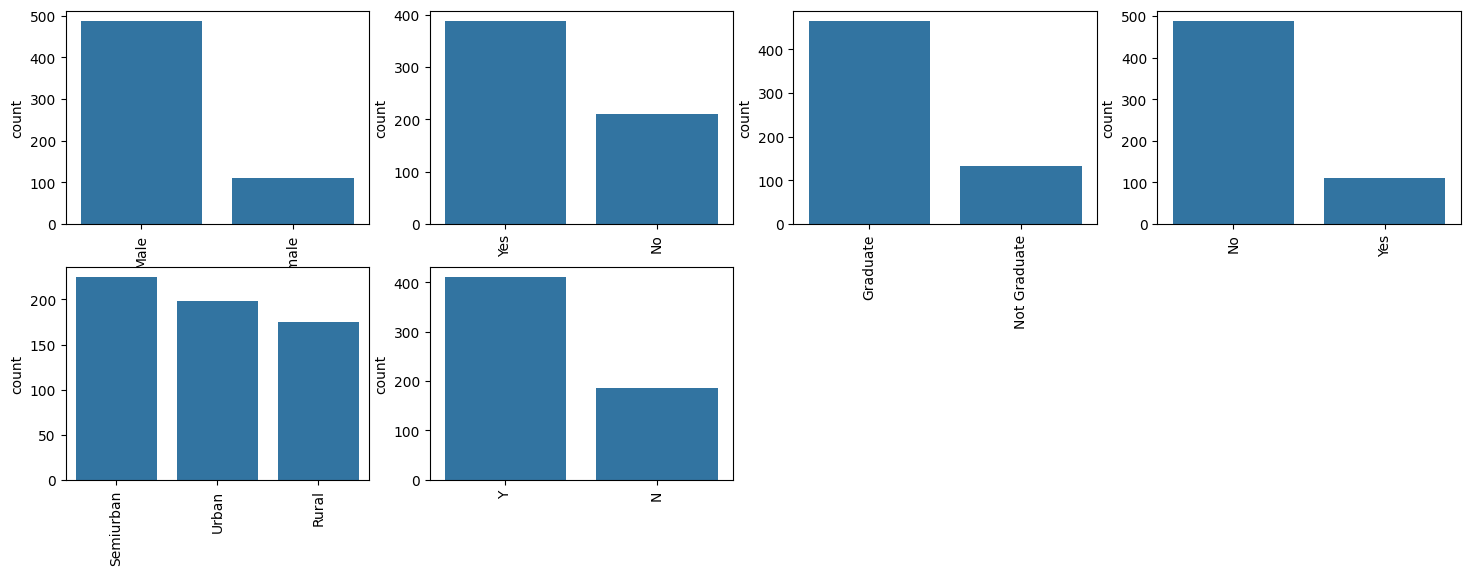

In [ ]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1
for col in object_cols:
  y = df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

In [ ]:
missing_values = df.isnull().sum()
missing_value = missing_values[missing_values > 0]
columns_with_missing_values = missing_value.index.tolist()
print(columns_with_missing_values)

['Dependents', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [ ]:
for cols in columns_with_missing_values:
  df[cols].fillna(df[cols].mean(), inplace = True)
df.head()

<ipython-input-6-4c6e9d8ca1d5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[cols].fillna(df[cols].mean(), inplace = True)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,144.968804,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [ ]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
for col in object_cols:
  label_encoder = LabelEncoder()
  df[col] = label_encoder.fit_transform(df[col])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,144.968804,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [ ]:
columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
z_scores = np.abs(zscore(df[columns]))
outlier_counts = (z_scores > 3).sum(axis=0)
print("Outlier Counts:")
print(outlier_counts)
df[columns] = np.where(z_scores > 3, 3, df[columns])
print("DataFrame after Outlier Treatment:")
print(df.head(5))

Outlier Counts:
ApplicantIncome      18
CoapplicantIncome    11
LoanAmount            8
Loan_Amount_Term     12
dtype: int64
DataFrame after Outlier Treatment:
   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0         0.0          0              0           5849.0   
1       1        1         1.0          0              0           4583.0   
2       1        1         0.0          0              1           3000.0   
3       1        1         0.0          1              0           2583.0   
4       1        0         0.0          0              0           6000.0   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  144.968804             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.0

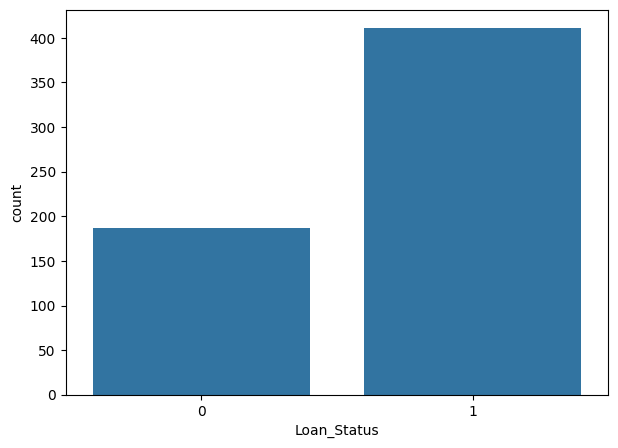

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='Loan_Status',data=df)
plt.show()

In [ ]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (478, 10)
X_test shape: (120, 10)
y_train shape: (478,)
y_test shape: (120,)


In [ ]:
loan_counts = y_train.value_counts()
print("Loan Status Counts: \n")
print(loan_counts)
if loan_counts.min()/loan_counts.max()<0.5:
  smote = SMOTE(random_state=42)
  X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
  print("After SMOTE Oversampling:")
  print(y_resampled.value_counts())
else:
  X_resampled, y_resampled = X_train, y_train

Loan Status Counts: 

Loan_Status
1    334
0    144
Name: count, dtype: int64
After SMOTE Oversampling:
Loan_Status
1    334
0    334
Name: count, dtype: int64


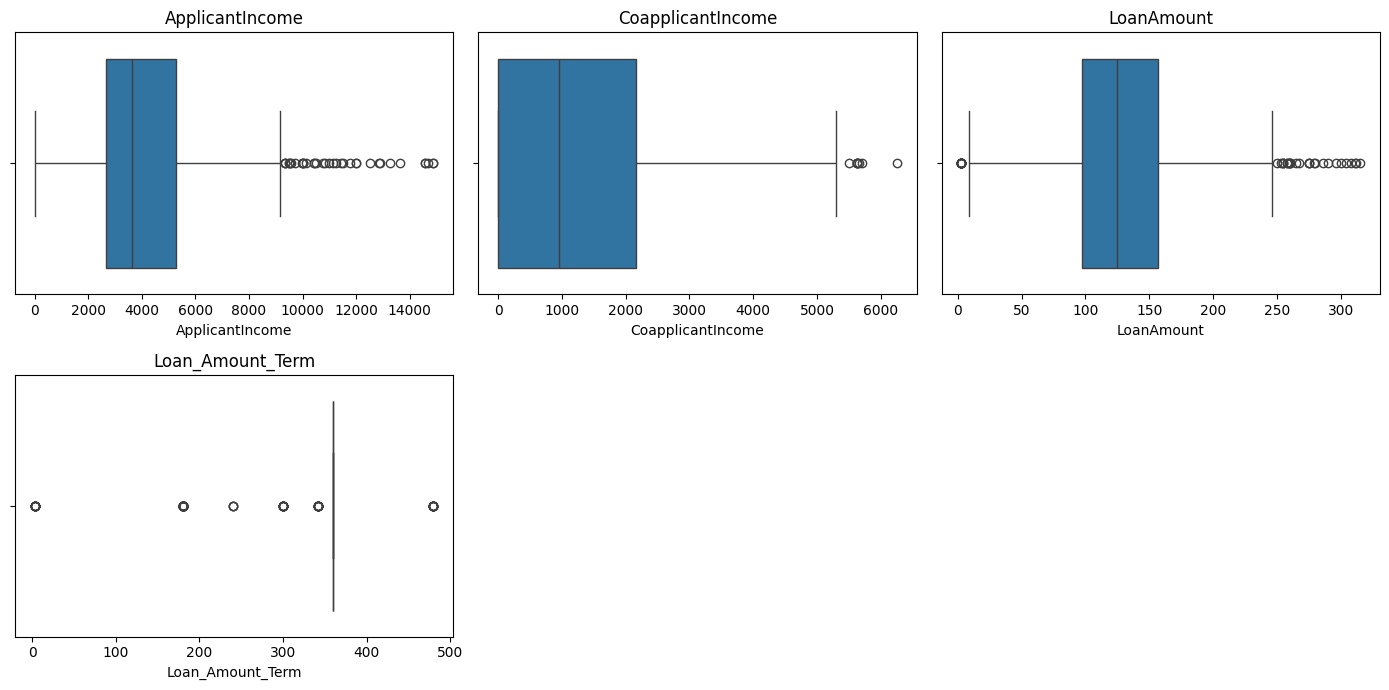

In [ ]:
plt.figure(figsize=(14, 7))
n_cols = 3
n_rows = -(-len(columns) // n_cols)
for i, col in enumerate(columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'{col}')
    plt.tight_layout()
plt.show()

In [ ]:
models= {
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}
for model_name in models:
  model = models[model_name]
  scores = cross_val_score(model,X,y,cv=100,scoring='accuracy',n_jobs=-1)
  print("==" * 30)
  print(model_name)
  print(f"Cross-Validation Scores: {scores}")
  print(f"Mean Accuracy: {np.mean(scores):.4f}")

Random Forest
Cross-Validation Scores: [0.83333333 1.         0.83333333 0.83333333 1.         0.83333333
 1.         1.         0.83333333 0.83333333 0.66666667 0.66666667
 0.83333333 0.83333333 0.66666667 0.83333333 0.83333333 0.5
 0.83333333 1.         0.66666667 0.83333333 0.5        0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.66666667 0.66666667
 0.5        0.83333333 0.83333333 0.83333333 0.83333333 0.5
 1.         0.66666667 0.66666667 0.5        0.83333333 0.83333333
 0.66666667 0.66666667 0.83333333 0.83333333 0.83333333 0.5
 0.66666667 1.         0.83333333 0.83333333 0.66666667 0.83333333
 0.83333333 1.         0.66666667 0.83333333 0.83333333 0.83333333
 0.66666667 0.66666667 0.83333333 0.83333333 1.         1.
 0.33333333 1.         0.83333333 0.66666667 0.83333333 1.
 0.83333333 0.66666667 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.66666667 0.5        0.83333333
 0.66666667 0.66666667 0.5        0.83333333 1.         1.
 

In [ ]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_resampled, y_resampled)
y_pred = logreg.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

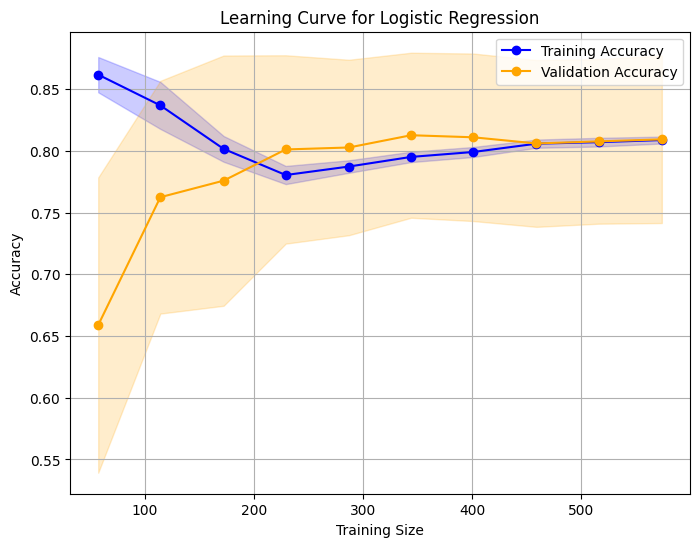

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    logreg, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=25, scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='orange', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='orange')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Logistic Regression')
plt.legend()
plt.grid()
plt.show()

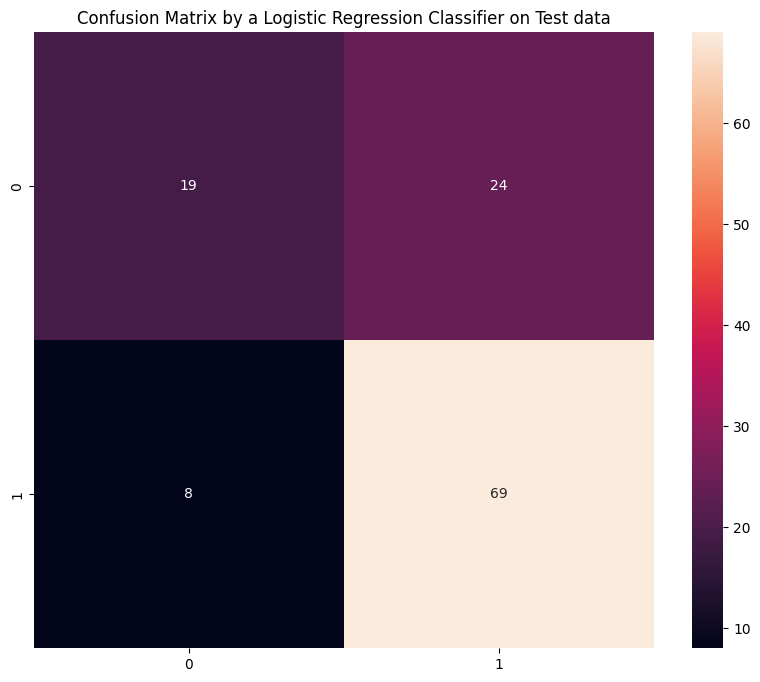

In [ ]:
cf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix by a Logistic Regression Classifier on Test data")
plt.show()